In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head

<bound method NDFrame.head of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none      

In [12]:
df.shape

(1000, 8)

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
print("categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:     ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:     ",end=" ")
print(df['test_preparation_course'].unique())


categories in 'gender' variable:      ['female' 'male']
categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:      ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:      ['none' 'completed']


In [20]:
# define numerical and categorical column
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'o']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'o']

#print column
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 8 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

we have 0 categorical features : []


In [16]:
#Adding columns for "Total score" and "Average"
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')


Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of student with less than 20 marks in maths: {math_less_20}')
print(f'Number of student with less than 20 marks in writing: {writing_less_20}')
print(f'Number of student with less than 20 marks in reading: {reading_less_20}')


Number of student with less than 20 marks in maths: 4
Number of student with less than 20 marks in writing: 3
Number of student with less than 20 marks in reading: 1


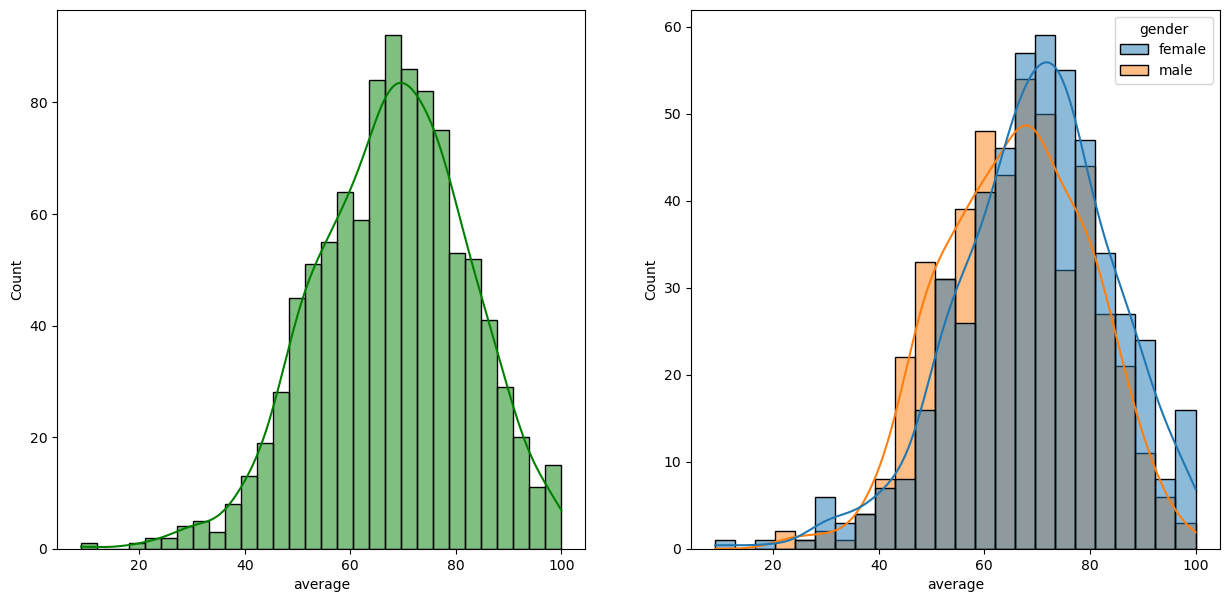

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

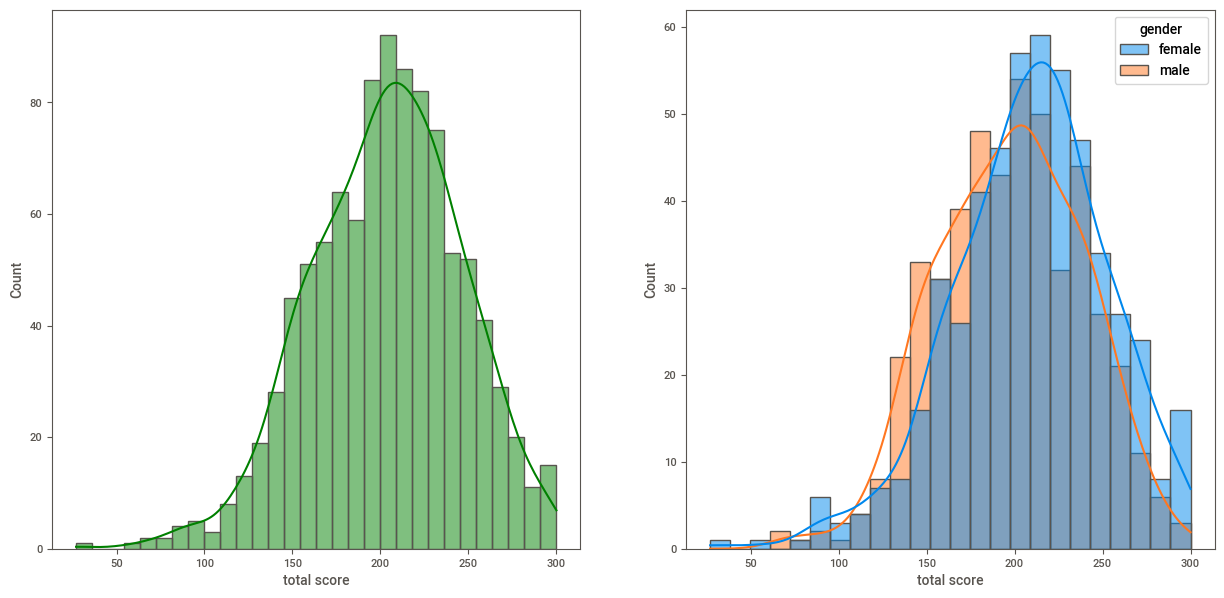

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

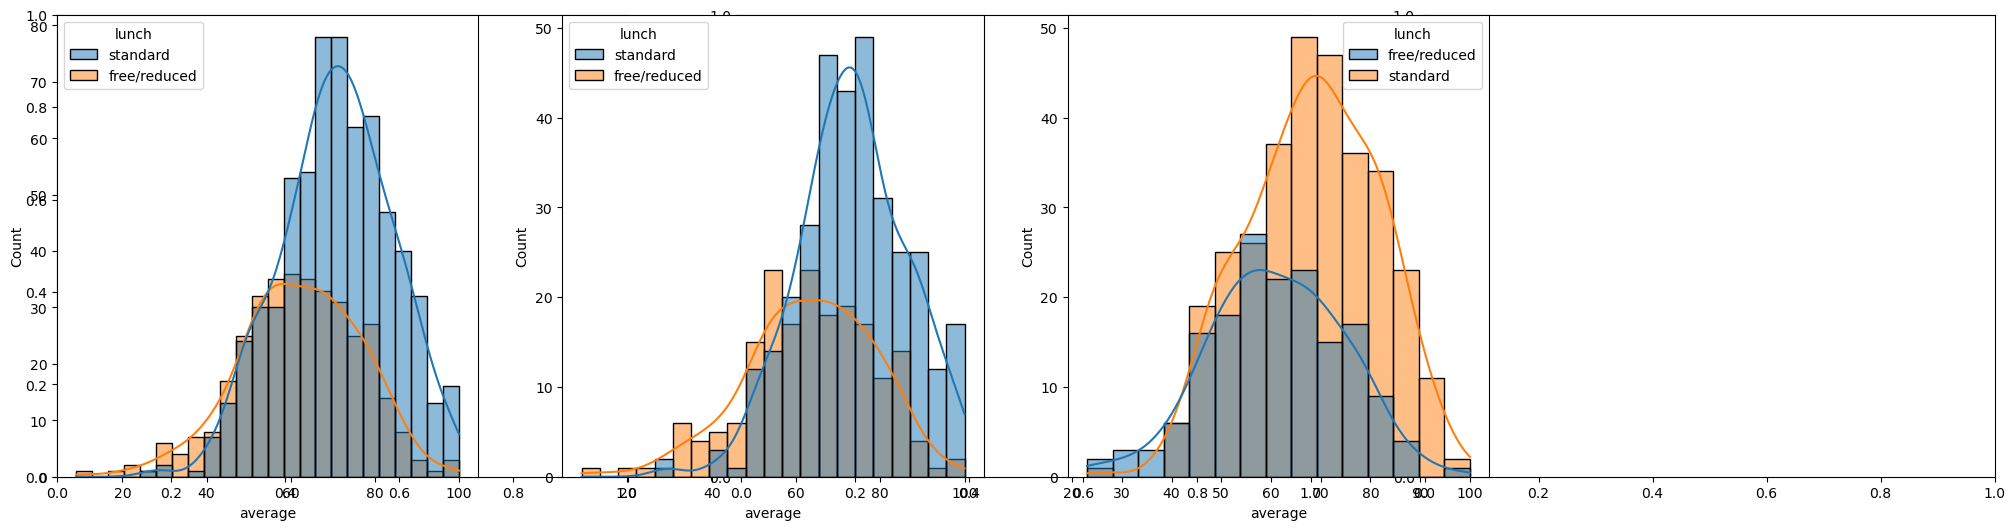

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

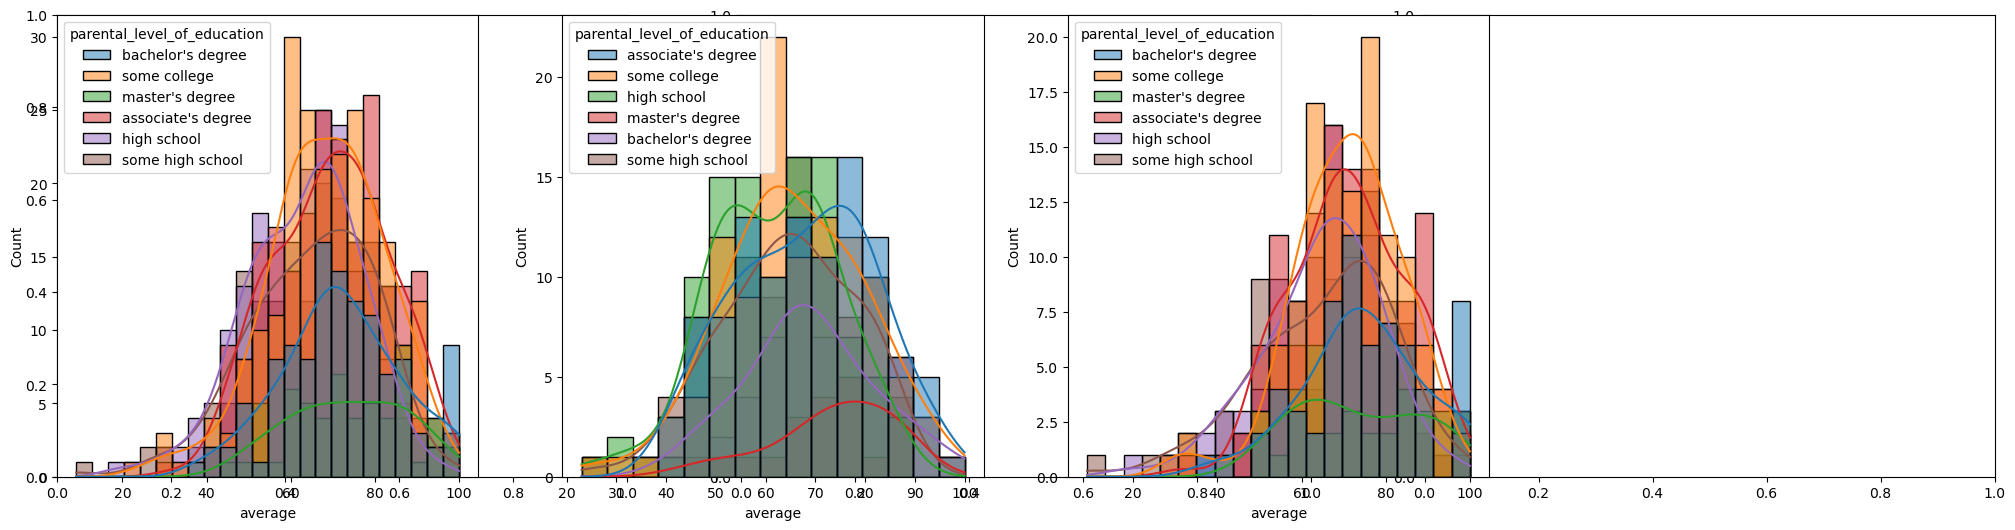

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

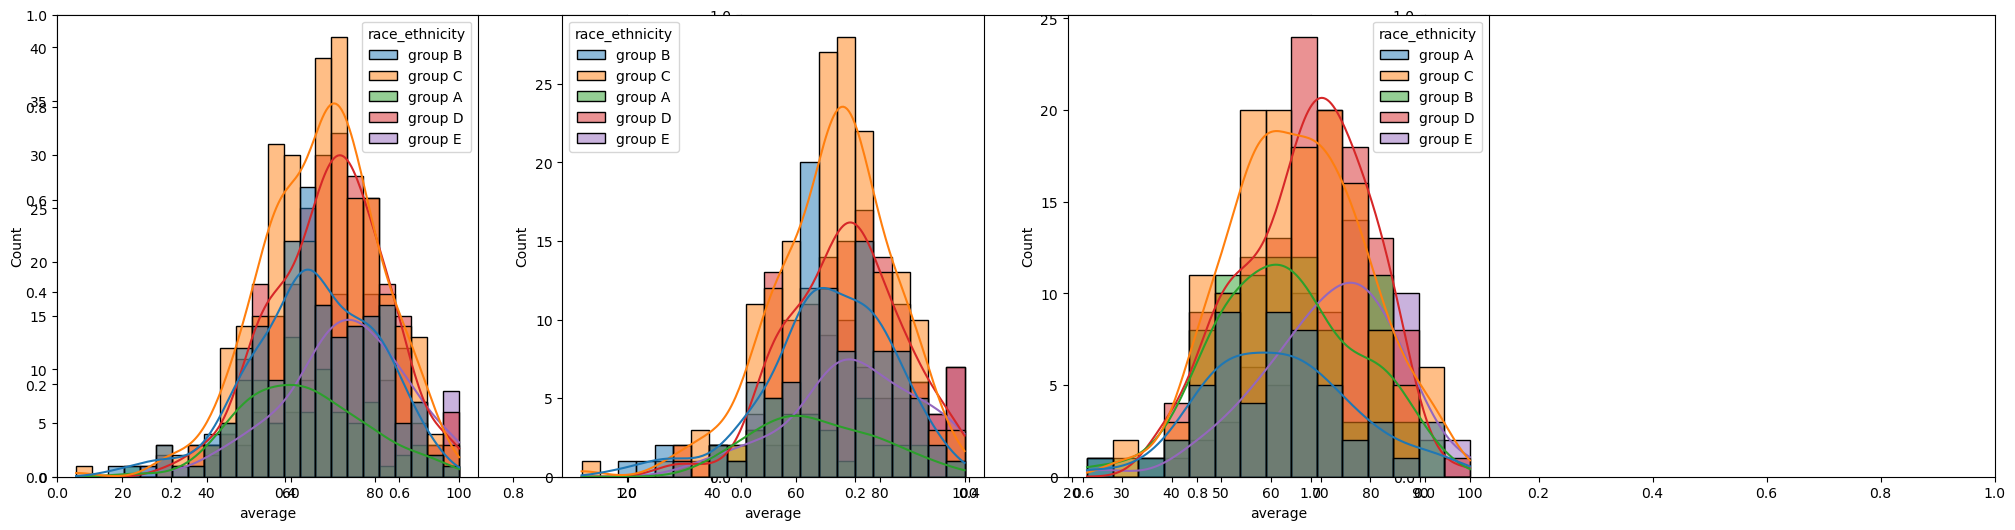

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

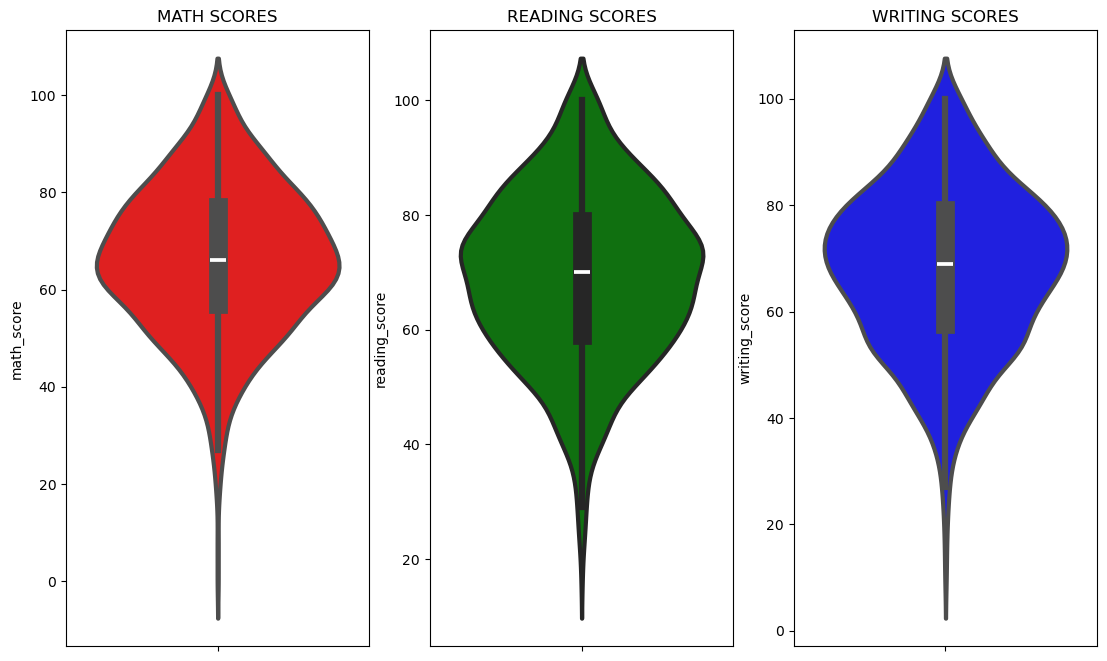

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

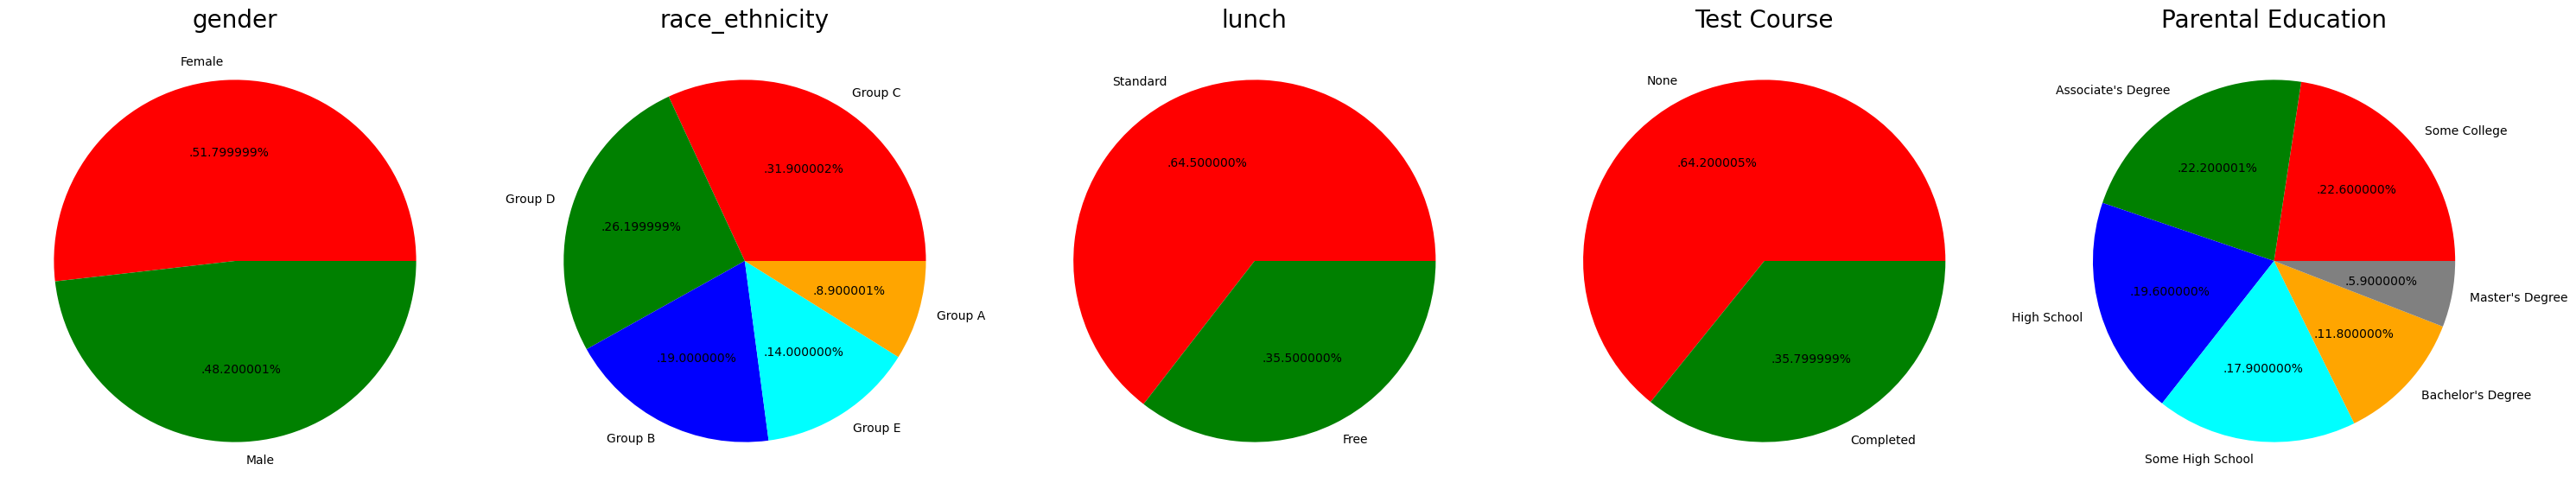

In [41]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

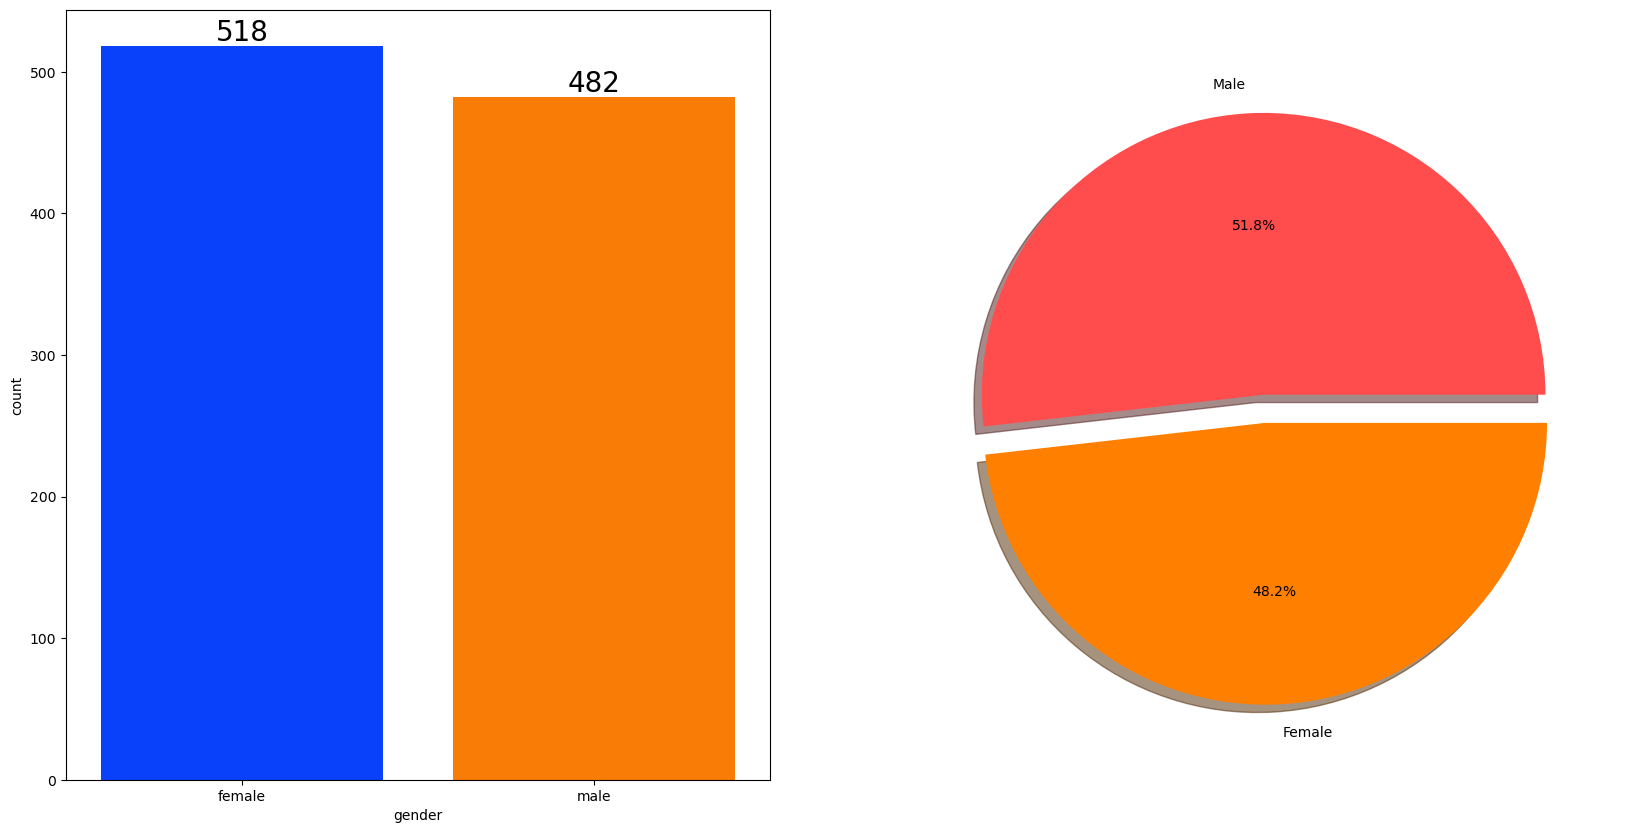

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [61]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

NameError: name 'gender_group' is not defined

<Figure size 1000x800 with 0 Axes>

In [1]:
!pip install dataprep
from dataprep.eda import create_report
df = pd.read_csv('data/stud.csv')
create_report(df)


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
      running egg_info
      writing levenshtein.egg-info\PKG-INFO
      writing dependency_links to levenshtein.egg-info\dependency_links.txt
      deleting levenshtein.egg-info\entry_points.txt
      writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
      writing requirements to levenshtein.egg-info\requires.txt
      writing top-level names to levenshtein.egg-info\top_level.txt
      reading manifest file 'levenshtein.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      adding license file 'COPYING'
 

  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached aiohttp-3.10.8-cp312-cp312-win_amd64.whl.metadata (7.8 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached Bottleneck-1.4.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.4-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.6.1-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Metaphone-0.6-py3-none-any.whl
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadat

ModuleNotFoundError: No module named 'dataprep'